Exercise 1
$max  \quad \sum_{i=1}^{m} \sum_{j=1}^{n} p_{j} x_{i j} \\
s.t.   \quad \sum_{j=1}^{n} w_{j} x_{i j} \leq c_{i} \\
      \quad\qquad\sum_{i=1}^{m} x_{i j} \leq 1 \\
      \quad\qquad x_{i j} \in\{0,1\} \\
where   \quad x_{i j}=\left\{\begin{array}{c}1 \text { if item j is assigned to knapsack i } \\ \text { 0 otherwise }\end{array}\right.$

Exercise 2

In [6]:
import random
import pyomo.environ as pyo
from pyomo.environ import *

In [5]:
random.seed(1)
n=10000 #number of packages
b=200 #number of bins
c=50

#Generate random locations
vj=random.choices(range(10, 100),k=n)
wj=random.choices(range(5, 20),k=n)

In [7]:
model=pyo.ConcreteModel()

model.i=RangeSet(0,b-1)
model.j=RangeSet(0,n-1)
model.p=Param(model.j,initialize=vj)
model.w=Param(model.j,initialize=wj)
model.x=Var(model.j,model.i,within=Binary)

def objective(model):
    result=0
    for j in model.j:
        for i in model.i:
            result+=model.p[j]*model.x[j,i]
    return result
model.cost=Objective(rule=objective,sense=maximize)

def constraint1(model,i):
    total=0
    for j in model.j:
        total+=model.w[j]*model.x[j,i]
    return total<=c
model.cons1=Constraint(model.i,rule=constraint1)

def constraint2(model,j):
    total=0
    for i in model.i:
        total+=model.x[j,i]
    return total<=1
model.cons2=Constraint(model.j,rule=constraint2)

instance=model.create_instance()
opt=pyo.SolverFactory('gurobi')
opt.solve(instance,options={'TimeLimit': 10000},tee=True)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-29
Read LP format model from file C:\Users\dell\AppData\Local\Temp\tmphbe4gbq_.pyomo.lp
Reading time = 6.50 seconds
x2000001: 10201 rows, 2000001 columns, 4000001 nonzeros
Set parameter TimeLimit to value 10000
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 10201 rows, 2000001 columns and 4000001 nonzeros
Model fingerprint: 0x20eebf97
Variable types: 1 continuous, 2000000 integer (2000000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Found heuristic solution: objective 44250.000000
Presolve removed 1 rows and 1 columns (presolve time = 5s) ...
Presolve removed 1 rows and 1 columns
Presolve time: 6.43s
Presolved: 10200 rows, 2000000 columns, 4000000 nonzeros
Variable types: 0 

{'Problem': [{'Name': 'x2000001', 'Lower bound': 117926.0, 'Upper bound': 117926.0, 'Number of objectives': 1, 'Number of constraints': 10201, 'Number of variables': 2000001, 'Number of binary variables': 2000000, 'Number of integer variables': 2000000, 'Number of continuous variables': 1, 'Number of nonzeros': 4000001, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Return code': '0', 'Message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Wall time': '66.78540992736816', 'Error rc': 0, 'Time': 81.06724262237549}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

Exercise 3

In [28]:
import random
import numpy as np
import copy
import time
import matplotlib.pyplot as plt
import math

In [43]:
#convert the binary result to a table.
import pandas as pd

def final_table(x):
        container=list(range(1,b+1))
        container.append('Total')
        package=[]
        for i in range(b):
            package.append([])
            for j in range(n):
                if x[j,i]==1:
                    package[i].append(j+1)
        package.append('')
        
        profits=[]
        weights=[]
        for i in range(b):
            profit=0
            weight=0
            for j in package[i]:
                profit+=vj[j-1]
                weight+=wj[j-1]
            profits.append(profit)
            weights.append(weight)
        profits.append(best_value)
        weights.append('')
        data={'Container':container,'Packages':package,'Profit':profits,'Weight':weights}
        return pd.DataFrame(data)    

In [46]:
#convert the binary result to a table.
import pandas as pd

def final_table(x):
        container=list(range(1,b+1))
        container.append('Total')
        package=[]
        for i in range(b):
            package.append([])
            for j in range(n):
                if x[j,i]==1:
                    package[i].append(j+1)
        package.append('')
        
        profits=[]
        weights=[]
        for i in range(b):
            profit=0
            weight=0
            for j in package[i]:
                profit+=vj[j-1]
                weight+=wj[j-1]
            profits.append(profit)
            weights.append(weight)
        profits.append(best_value)
        weights.append('')
        data={'Container':container,'Packages':package,'Profit':profits,'Weight':weights}
        return pd.DataFrame(data)   

Random Generation

    Container                        Packages   Profit Weight
0           1        [1351, 1636, 4604, 7262]    216.0     48
1           2           [98, 409, 2043, 8172]    142.0     44
2           3          [91, 3106, 3759, 3941]    162.0     46
3           4              [2372, 3346, 7994]    240.0     39
4           5  [1099, 3968, 6789, 7359, 9998]    218.0     39
..        ...                             ...      ...    ...
196       197   [569, 1419, 3920, 8654, 9090]    290.0     49
197       198   [646, 2380, 3549, 4888, 9402]    354.0     42
198       199         [436, 1938, 5951, 9901]    242.0     42
199       200        [2250, 3787, 8260, 9564]    183.0     46
200     Total                                  43685.0       

[201 rows x 4 columns]


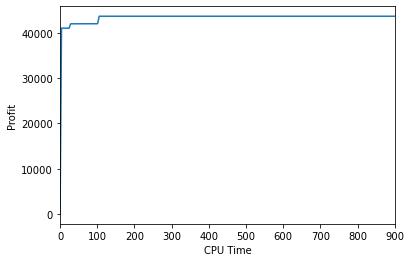

In [47]:
result=np.zeros((n,b))
iteration=0
best_value=0
start=time.time()
end=time.time()
time_list=[0]
value_list=[0]

while end-start<60*15:
    #randomly generate a result
    for i in range(n):
        #whether to put the item in a knapsack
        a=random.randint(0,3)
        if a==1:
            #decide to put in which knapsack
            j=random.randint(0,b-1)
            result[i,j]=1
    
    #check whether the result is valid
    valid=True
    overweight={}
    for i in range(b):
        weight=0
        for j in range(n):
            weight+=wj[j]*result[j,i]
        if weight>c:
            valid=False
            overweight[i]=weight
    
    #randomly remove items until it meets the constraint
    if valid==False:
        for i,w in overweight.items():
            in_bag=[]
            for j in range(n):
                if result[j,i]==1:
                    in_bag.append(j)
            while w>c:
                a=random.randint(0,len(in_bag)-1)
                result[in_bag[a],i]=0
                w-=wj[in_bag[a]]
                in_bag.pop(a)

    #calculate the new value
    cur_value=0
    for i in range(n):
        for j in range(b):
            cur_value+=vj[i]*result[i,j]
    if cur_value>best_value:
        best_value=cur_value
    end=time.time()
    time_list.append(end-start)
    value_list.append(best_value)
print(final_table(result))
plt.xlabel('CPU Time')
plt.ylabel('Profit')
plt.xlim((0,60*15))
plt.plot(time_list,value_list)

Local Search: Choose 1 random neighbour

    Container                        Packages   Profit Weight
0           1  [3030, 3195, 5309, 9320, 9413]    290.0     49
1           2  [4455, 6405, 7495, 8945, 9264]    235.0     47
2           3  [2964, 3961, 4074, 6736, 7096]    166.0     50
3           4  [3990, 4313, 5141, 5876, 5904]    250.0     48
4           5        [4069, 5970, 6347, 9368]    214.0     49
..        ...                             ...      ...    ...
196       197              [4859, 4951, 7537]    225.0     40
197       198        [3339, 4961, 7186, 7471]    248.0     43
198       199  [1038, 2391, 4566, 5263, 8935]    237.0     43
199       200              [1180, 7617, 9249]    203.0     49
200     Total                                  44142.0       

[201 rows x 4 columns]


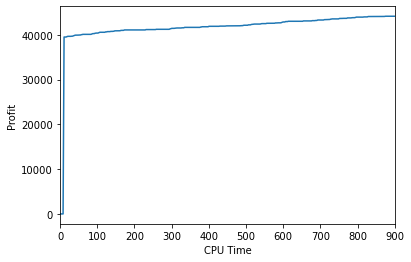

In [38]:
result=np.zeros((n,b))
iteration=0
best_value=0
start=time.time()
time_list=[0]
value_list=[0]

#generate a random solution
for i in range(n):
    #whether to put the item in a knapsack
    a=random.randint(0,5)
    if a==1:
        #decide to put in which knapsack
        j=random.randint(0,b-1)
        result[i,j]=1
    
#check whether the result is valid
valid=True
overweight={}
for i in range(b):
    weight=0
    for j in range(n):
        weight+=wj[j]*result[j,i]
    if weight>c:
        valid=False
        overweight[i]=weight
    
#randomly remove items until it meets the constraint
if valid==False:
    for i,w in overweight.items():
        in_bag=[]
        for j in range(n):
            if result[j,i]==1:
                in_bag.append(j)
        while w>c:
            a=random.randint(0,len(in_bag)-1)
            result[in_bag[a],i]=0
            w-=wj[in_bag[a]]
            in_bag.pop(a)

end=time.time()
while end-start<60*15:
    pre_result=copy.deepcopy(result)
    
    #choose which item to change
    i=random.randint(0,n-1)
    
    #check whether the item is already put in a bag, if so, remove it.
    for j in range(b):
        if result[i,j]==1:
            result[i,j]=0
            
    #choose a random bag to put it in
    j=random.randint(0,b-1)
    result[i,j]=1
    
    #check whether the result is valid
    valid=True
    for i in range(b):
        weight=0
        for j in range(n):
            weight+=wj[j]*result[j,i]
        if weight>c:
            valid=False
            result=pre_result
    
    #calculate the new value
    if valid==True:
        cur_value=0
        for i in range(n):
            for j in range(b):
                cur_value+=vj[i]*result[i,j]
        if cur_value>best_value:
            best_value=cur_value
        else:
            result=pre_result
    end=time.time()
    time_list.append(end-start)
    value_list.append(best_value)

print(final_table(result))
plt.xlabel('CPU Time')
plt.ylabel('Profit')
plt.xlim((0,60*15))
plt.plot(time_list,value_list)

Simulated Annealing

    Container                             Packages   Profit Weight
0           1       [1074, 2568, 3055, 7841, 8175]    293.0     49
1           2  [783, 2024, 5897, 7934, 8312, 9399]    297.0     48
2           3         [48, 1447, 1807, 1923, 3860]    242.0     48
3           4             [1038, 3389, 8226, 9909]    205.0     50
4           5                   [4931, 7875, 8467]    186.0     48
..        ...                                  ...      ...    ...
196       197                   [1336, 2037, 7381]    191.0     50
197       198                   [1574, 7426, 8283]    178.0     47
198       199             [3897, 5537, 7755, 9434]    230.0     50
199       200             [2599, 3732, 3836, 7546]    206.0     49
200     Total                                       42218.0       

[201 rows x 4 columns]


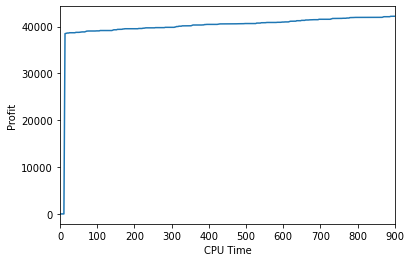

In [47]:
result=np.zeros((n,b))
iteration=0
best_value=0
start=time.time()
time_list=[0]
value_list=[0]
T=1000

#generate a random solution
for i in range(n):
    #whether to put the item in a knapsack
    a=random.randint(0,5)
    if a==1:
        #decide to put in which knapsack
        j=random.randint(0,b-1)
        result[i,j]=1
    
#check whether the result is valid
valid=True
overweight={}
for i in range(b):
    weight=0
    for j in range(n):
        weight+=wj[j]*result[j,i]
    if weight>c:
        valid=False
        overweight[i]=weight
    
#randomly remove items until it meets the constraint
if valid==False:
    for i,w in overweight.items():
        in_bag=[]
        for j in range(n):
            if result[j,i]==1:
                in_bag.append(j)
        while w>c:
            a=random.randint(0,len(in_bag)-1)
            result[in_bag[a],i]=0
            w-=wj[in_bag[a]]
            in_bag.pop(a)

end=time.time()
while end-start<60*15:
    pre_result=copy.deepcopy(result)
    
    #choose which item to change
    i=random.randint(0,n-1)
    
    #check whether the item is already put in a bag, if so, remove it.
    for j in range(b):
        if result[i,j]==1:
            result[i,j]=0
            
    #choose a random bag to put it in
    j=random.randint(0,b-1)
    result[i,j]=1
    
    #check whether the result is valid
    valid=True
    for i in range(b):
        weight=0
        for j in range(n):
            weight+=wj[j]*result[j,i]
        if weight>c:
            valid=False
            result=pre_result
    
    #calculate the new value
    if valid==True:
        cur_value=0
        for i in range(n):
            for j in range(b):
                cur_value+=vj[i]*result[i,j]
        p=random.random()
        if cur_value>best_value or p<math.exp((cur_value-best_value)/T):
            best_value=cur_value
        else:
            result=pre_result
    end=time.time()
    time_list.append(end-start)
    value_list.append(best_value)
    T=0.9*T

print(final_table(result))
plt.xlabel('CPU Time')
plt.ylabel('Profit')
plt.xlim((0,60*15))
plt.plot(time_list,value_list)